### <center>  Grupo 6 </center>

<center>David Alejandro Rojas Castro - da.rojasc123@uniandes.edu.co </center>
<center>Camila Malagón Suarez - c.malagons@uniandes.edu.co</center>
<center>Luis David Gutierrez - ld.gutierrezl1@uniandes.edu.co</center>
<center>David Zapata Vásquez - d.zapata11@uniandes.edu.co</center>

# Caso-taller:  PCA para estudiar la dimensionalidad de la calidad de vida en las ciudades 

En este caso-taller vamos a aplicar PCA en el estudio de calidad de vida en diferentes ciudades. Para ello, haremos uso de los datos que surgen del Almanaque Calificado de Lugares. En este Almanaque Boyer y Savageau calificaron 329 ciudades de acuerdo con los siguientes nueve criterios:

   - Clima y Terreno
   - Alojamiento
   - Cuidado de la salud y el medio ambiente
   - Crimen
   - Transporte
   - Educación
   - Artes
   - Recreación
   - Economía 

Con tantas variables disponibles, la matriz de dispersión puede resultar muy grande para estudiarla e interpretarla adecuadamente. Habría demasiadas correlaciones bivariadas entre las variables a considerar. Para interpretar los datos de una forma más significativa es necesario reducir el número de variables a unas pocas dimensiones, y para ello en este ejercicio recurriremos al análisis de componentes principales. 
 

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo junto al archivo de soporte.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en la misma ruta de acceso del cuaderno, por ejemplo: `data/archivo_de_soporte.csv`.

## Desarrollo


### 1. Carga de datos

En la carpeta `data` se encuentra el archivo `lugares.csv` cargue estos datos en su *cuaderno*.

In [1]:
# Utilice este espacio para escribir el código.
import pandas as pd
import numpy as np

lugares_df = pd.read_csv('data/lugares.csv')
lugares_df = lugares_df.set_index('Ciudad')
lugares_df.head()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633
"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727


#### Procedimiento

1. Importamos la librería `pandas`.
2. Cargamos el archivo CSV `lugares.csv` utilizando la función `pd.read_csv()`.
3. Mostramos las primeras filas del dataset utilizando el método `head()` para verificar que los datos se hayan cargado correctamente.

### 2.  Análisis descriptivo de las variables. 

Para el análisis descriptivo haga uso de estadísticas descriptivas y matrices de correlación. Indique además cuantas gráficas de dispersión bivariadas debería examinar con este número de variables. 

Explique porqué es importante conocer las estadísticas descriptivas y como contribuyen al ejercicio posterior de Análisis de Componentes Principales.
 
Tenga en cuenta que para las variables, a excepción de la alojamiento y crimen, cuanto mayor sea el puntaje, mejor. Por el contrario; para alojamiento y crimen, mientras más bajo sea el puntaje, mejor. También, mientras algunas comunidades podrían calificar mejor en las artes, otras podrían calificar mejor en otras áreas como tener una tasa de criminalidad más baja y buenas oportunidades educativas.

       Clima y Terreno   Alojamiento  Cuidado de la salud y el medio ambiente  \
count       329.000000    329.000000                               329.000000   
mean        538.732523   8346.559271                              1185.738602   
std         120.808259   2385.262622                              1003.002036   
min         105.000000   5159.000000                                43.000000   
25%         480.000000   6760.000000                               583.000000   
50%         542.000000   7877.000000                               833.000000   
75%         592.000000   9015.000000                              1445.000000   
max         910.000000  23640.000000                              7850.000000   

            Crimen   Transporte    Educación         Artes   Recreación  \
count   329.000000   329.000000   329.000000    329.000000   329.000000   
mean    961.054711  4210.082067  2814.887538   3150.884498  1845.957447   
std     357.154186  1451.179240   320.792953 

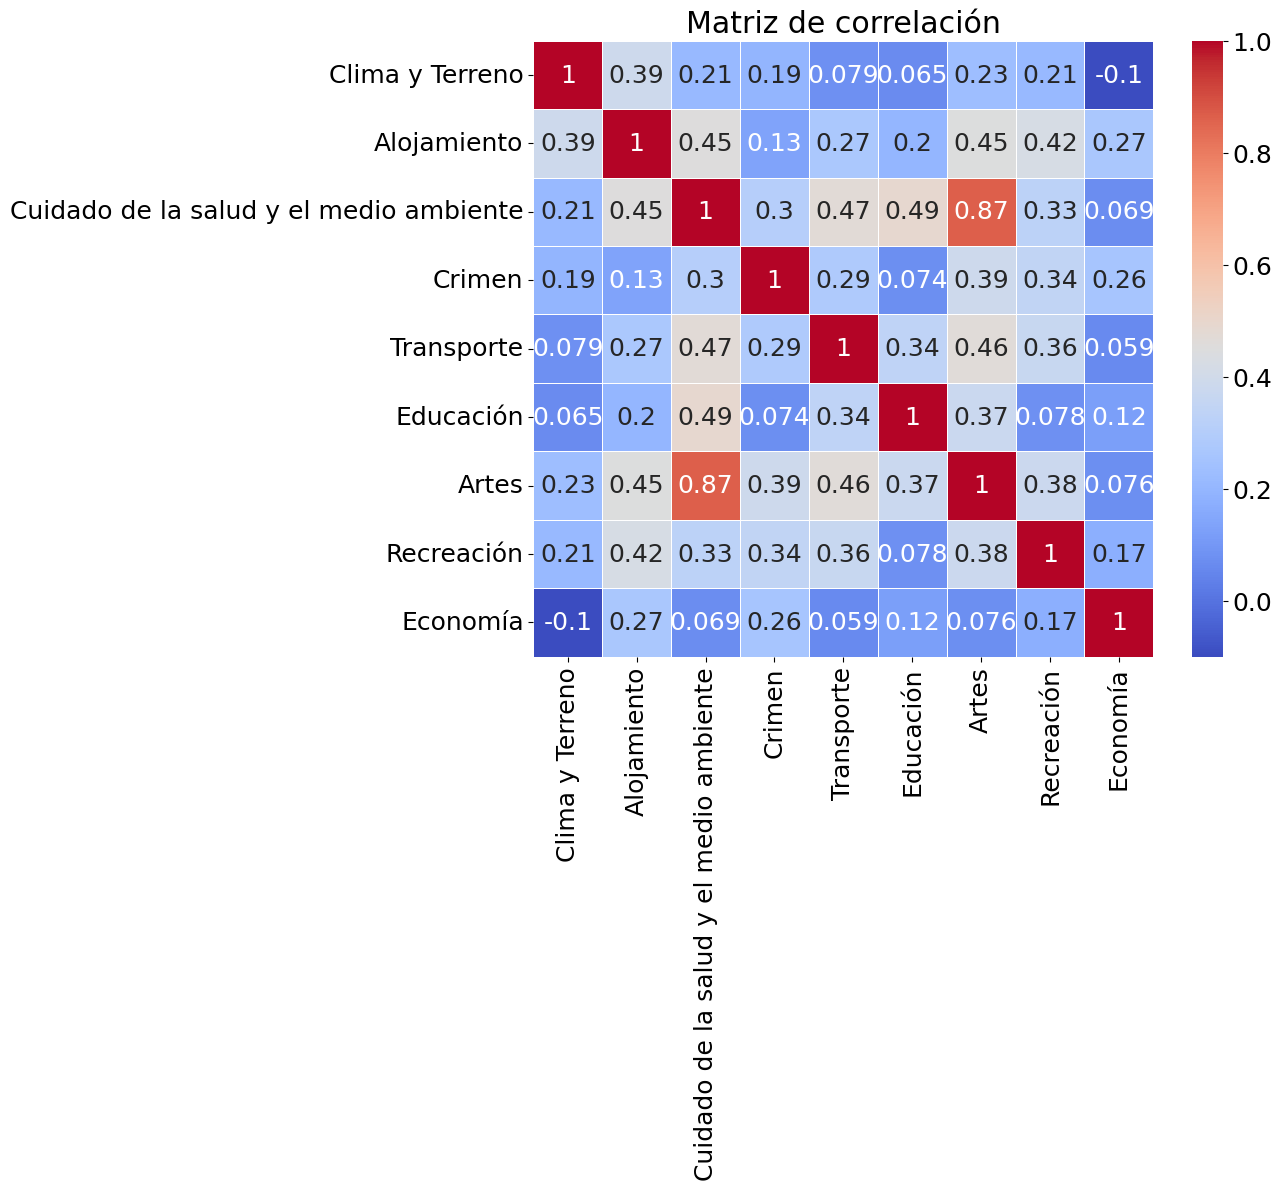

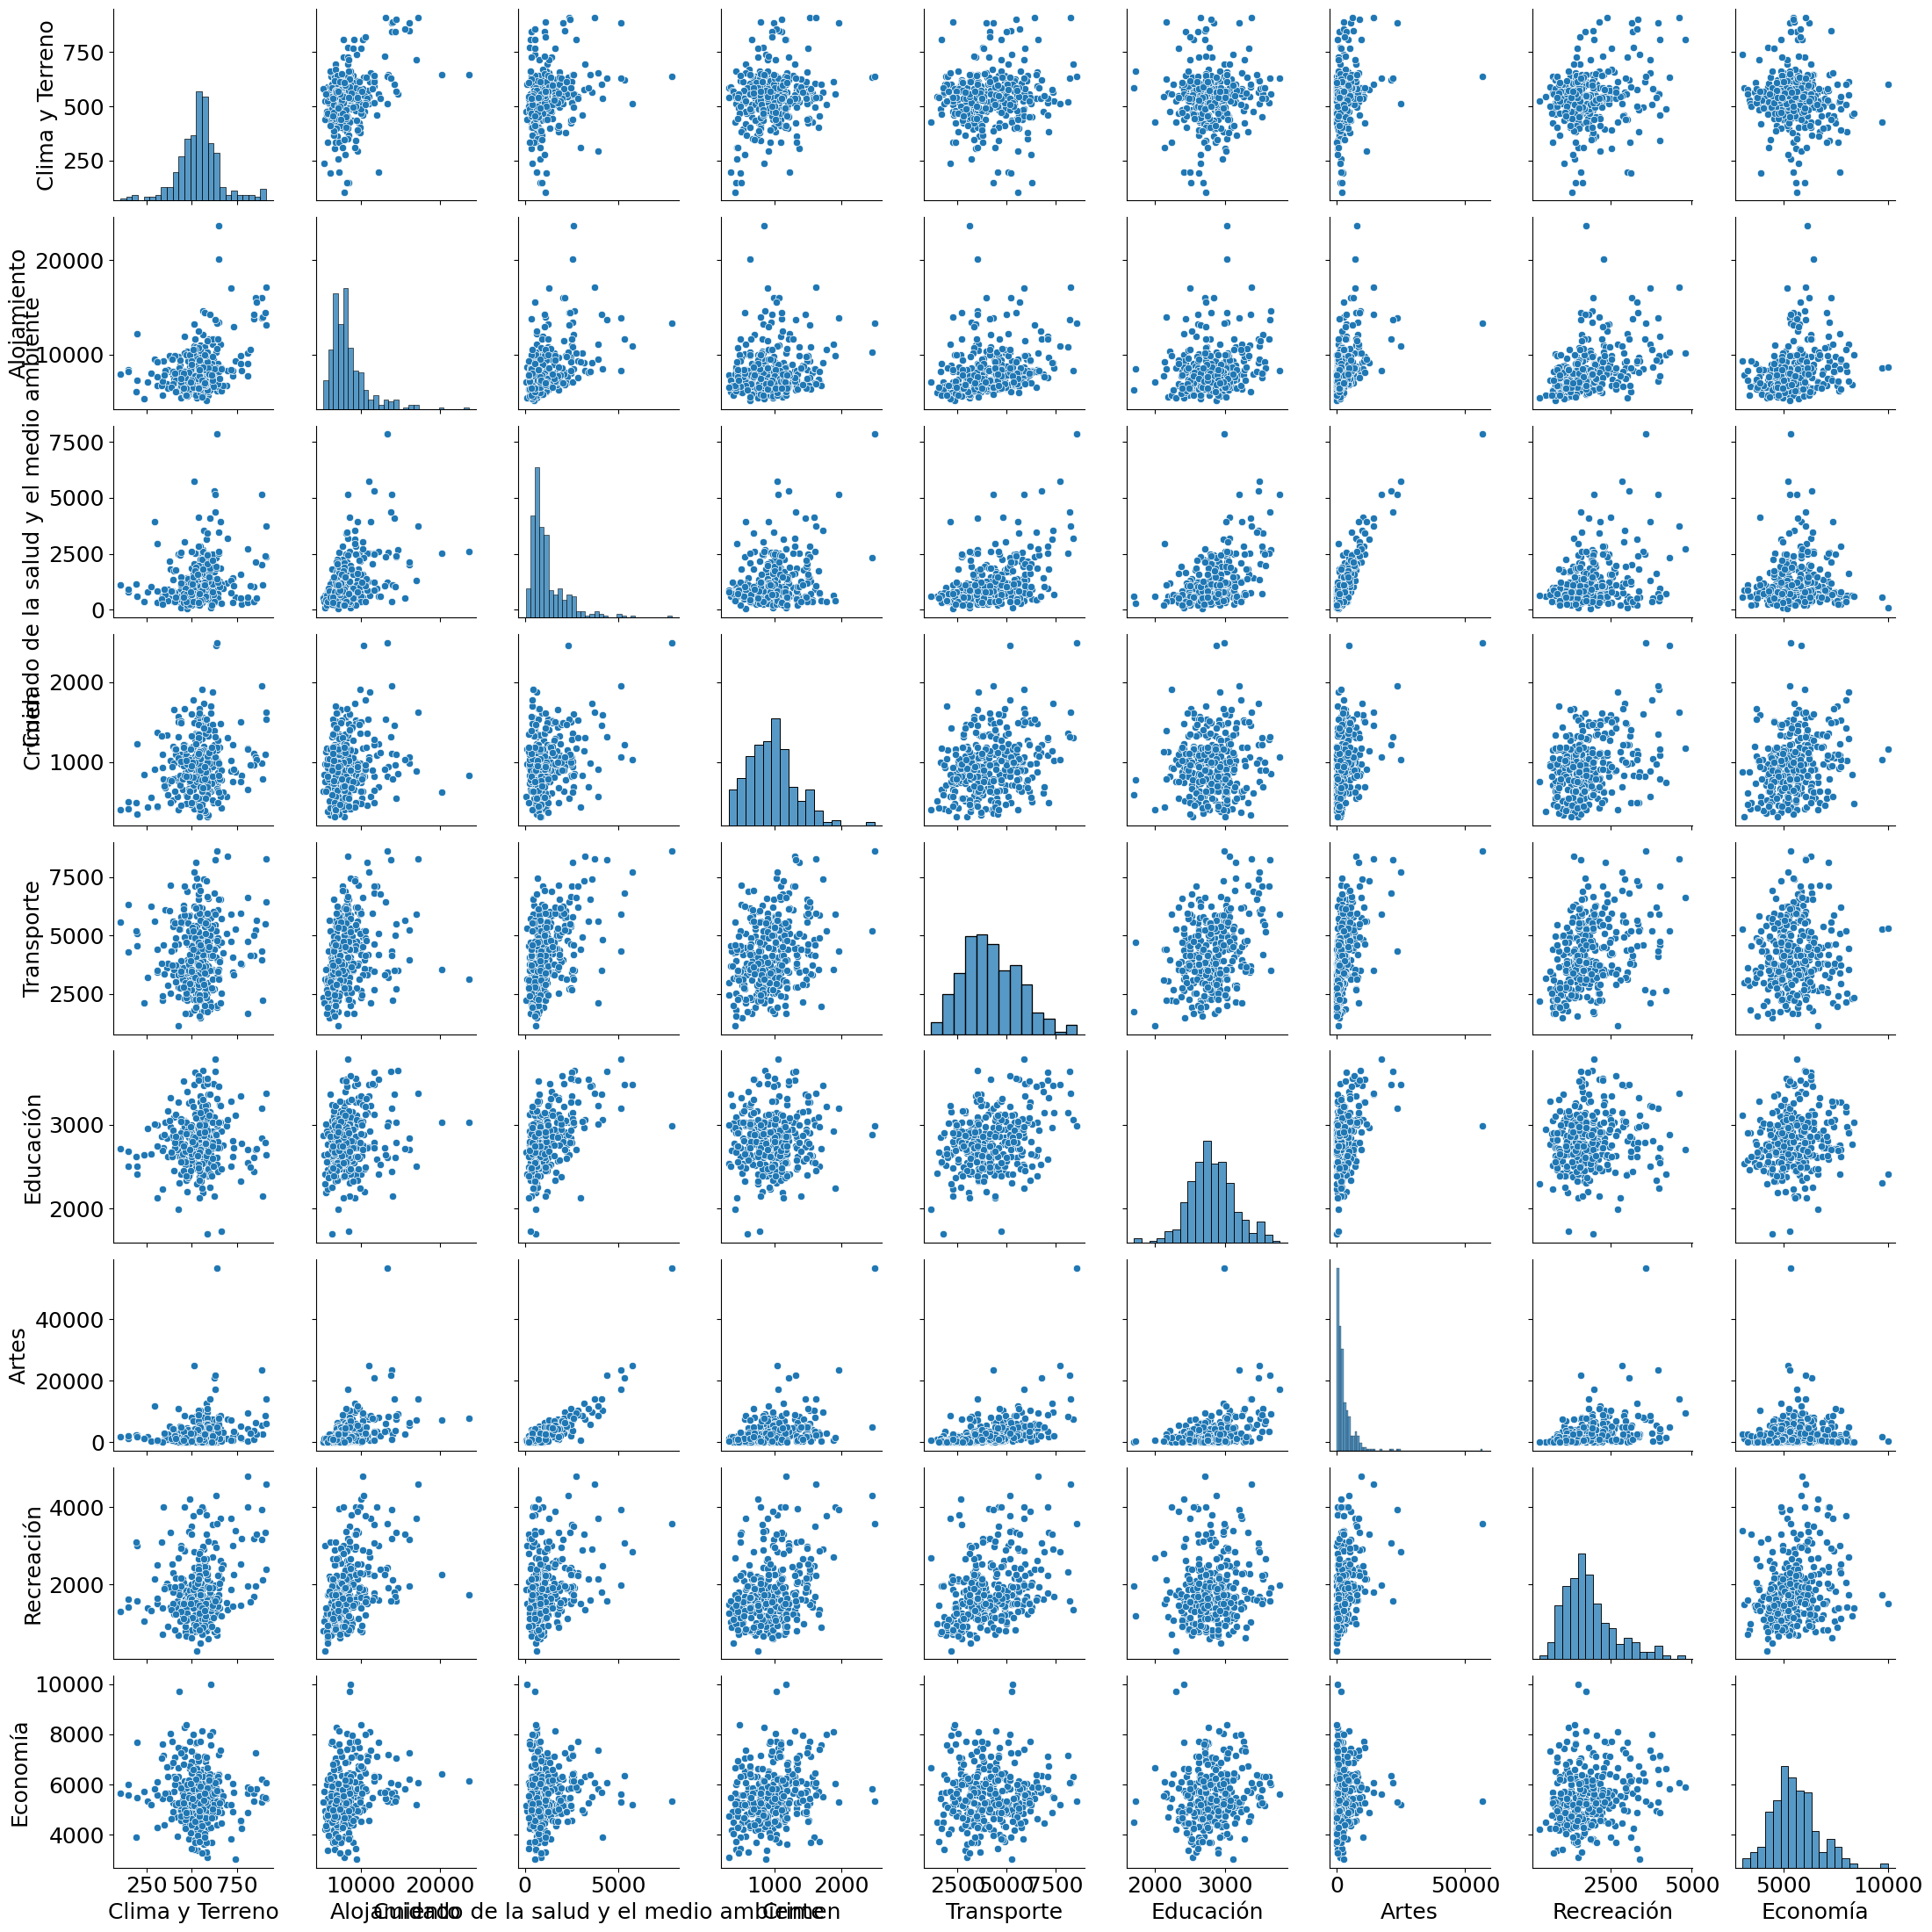

In [94]:
# Utilice este espacio para escribir el código.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular estadísticas descriptivas
descriptive_stats = lugares_df.describe()
print(descriptive_stats)

# Calcular la matriz de correlación
correlation_matrix = lugares_df.corr()
print(correlation_matrix)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

# Generar gráficos de dispersión bivariada
sns.pairplot(lugares_df)
plt.show()

#### Procedimiento:

1. **Cálculo de estadísticas descriptivas**:
    - Usamos la librería `pandas` para manipular y analizar los datos.
    - Se calculan las estadísticas descriptivas básicas (media, mediana, desviación estándar, mínimo y máximo) usando el método `describe()` de pandas, esto nos ayuda a entender la distribución y el rango de cada variable.
2. **Cálculo de la matriz de correlación**: 
    - Se calcula la matriz de correlación usando el coeficiente de correlación de Pearson con el método `corr()` de pandas, para evaluar las relaciones lineales entre las variables. La matriz se visualiza utilizando un heatmap para facilitar la interpretación.
    - Visualizamos la matriz de correlación utilizando un heatmap de la librería `seaborn`, específicamente la función `sns.heatmap()`, para facilitar la interpretación
3. **Generación de gráficos de dispersión bivariada**:
   - Generamos gráficos de dispersión bivariada para visualizar las relaciones entre pares de variables usando la función `sns.pairplot()` de seaborn.
   - Con 9 variables, hay un total de $\binom{9}{2} = 36$ gráficos de dispersión bivariada que se deben examinar.

#### Análisis:

- **Estadísticas descriptivas**:
  - Las estadísticas descriptivas revelan que algunas variables tienen una gran variabilidad, como `Artes` y `Recreación`.
  - Los valores medios y las desviaciones estándar varían considerablemente entre las variables, indicando diferentes escalas y distribuciones.
- **Matriz de correlación**:
  - La matriz de correlación muestra relaciones significativas entre varias variables. Por ejemplo, `Cuidado de la salud y el medio ambiente` tiene una fuerte correlación con `Artes` (0.87).
  - Algunas variables, como `Crimen` y `Economía`, tienen correlaciones moderadas con varias otras variables, sugiriendo relaciones interesantes que podrían influir en futuros análisis.
- **Gráficos de dispersión bivariada**:
  - Los gráficos de dispersión permiten observar visualmente las relaciones entre pares de variables. Se pueden identificar patrones, tendencias y posibles outliers.
  - Sin embargo, al tener tantas variables se dificulta un el análisis detallado de cada una y sus comportamientos individuales y cruzados.

#### Conclusiones:

- **Importancia de las estadísticas descriptivas**:
  - Las estadísticas descriptivas son cruciales para obtener una visión general del dataset, identificar distribuciones y preparar los datos para análisis más profundos.
  - En el contexto del análisis de componentes principales (PCA), conocer estas estadísticas permite identificar qué variables tienen mayor variabilidad y cómo están distribuidas.
- **Contribución al análisis de componentes principales (PCA)**:
  - Conocer las correlaciones entre variables es clave para aplicar PCA, ya que este análisis busca combinar variables correlacionadas en componentes principales.
  - Variables con alta correlación positiva o negativa pueden influir fuertemente en los componentes principales, es fundamental tener en cuenta estas relaciones.
  - **La normalización de las variables es necesaria antes de aplicar PCA**, dado que las variables tienen diferentes escalas y rangos.
- **Relaciones clave identificadas**:
  - La fuerte correlación entre `Cuidado de la salud y el medio ambiente` y `Artes` sugiere que estas dos variables podrían ser agrupadas en un mismo componente principal en el PCA.
  - La variabilidad en variables como `Artes` y `Recreación` indica que estas áreas tienen una amplia gama de valores, lo que podría afectar su contribución a los componentes principales.

#### Notas adicionales:
- Es importante considerar que, a excepción de `Alojamiento` y `Crimen`, puntajes más altos indican mejores condiciones de vida.
- En `Alojamiento` y `Crimen`, puntajes más bajos son preferibles.
- Diferentes comunidades pueden tener fortalezas en distintas áreas, como las artes o la tasa de criminalidad, lo cual debe ser considerado al interpretar los resultados del PCA

### 3.  Cálculo y selección de componentes principales.

Utilizando Álgebra Lineal, calcule los eigen valores y los eigen vectores, a partir de ellos obtenga los Componentes Principales. Tenga en cuenta de estandarizar las variables y explicar por qué es importante no omitir este paso. 

Luego, examine los valores propios para determinar cuántos componentes principales se deben considerar. Explique el criterio que utilizó para la elección y justifique su respuesta.

In [2]:
# Utilice este espacio para escribir el código.
# Estandarizamos los datos
mu = lugares_df.mean()
sigma = lugares_df.std()
lugares_scalado = (lugares_df - mu)/sigma
lugares_scalado.head()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Abilene,TX",-0.146782,-0.899926,-0.945899,-0.106550,-0.123405,-0.180451,-0.464186,-0.545815,1.943473
"Akron,OH",0.300207,-0.087437,0.468854,-0.210147,0.463704,-1.174862,0.519812,0.972960,-1.083816
"Albany,GA",-0.585494,-0.422410,-0.566039,0.025046,-1.157047,-0.794555,-0.627683,-1.221651,-0.253917
"Albany-Schenectady-Troy,NY",-0.519273,-0.183862,0.244527,-0.982922,1.841894,1.820839,0.324003,-0.283402,0.312259
"Albuquerque,NM",0.995524,0.019470,0.665264,1.461400,1.617938,0.658096,0.289753,0.948204,0.185930


In [39]:
# Se calculan los eigenvalores y los eigenvectores
S = lugares_scalado.cov()
eig_val, eig_vec = np.linalg.eig(S)
eig_vec=eig_vec.T

# A partir de los eigenvectores o pesos (loadings) se obtienen los componentes principales
componentes=lugares_scalado.dot(eig_vec.T) #calculamos f1
componentes.columns = ['CP1','CP2','CP3','CP4','CP5','CP6','CP7','CP8','CP9'] 
componentes.head()

,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9
Ciudad,,,,,,,,,
"Abilene,TX",-1.040180,0.893769,-1.436654,0.509834,-0.565136,-0.497854,0.423751,1.001776,0.347404
"Akron,OH",0.439814,0.075066,1.154717,-1.112207,0.996884,0.628547,0.011895,0.418746,-0.121685
"Albany,GA",-1.875539,0.069792,-0.073347,-0.046232,-0.679524,0.714097,0.239494,-0.441897,-0.094201
"Albany-Schenectady-Troy,NY",0.910741,-1.817582,-1.096147,0.573581,0.769080,-1.271237,0.458716,0.371496,0.317277
"Albuquerque,NM",2.149248,0.328858,-0.019738,-1.031502,-0.238550,-1.284224,0.154544,0.148264,-0.307153


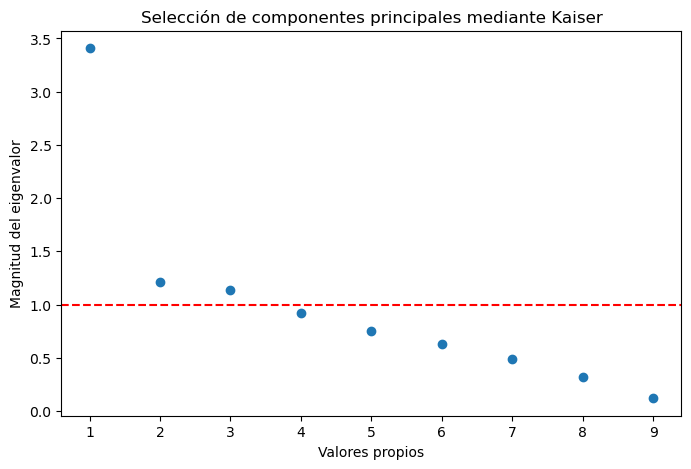

[3.4082918  1.21397617 1.14147915 0.92091782 0.75328488 0.6305619
 0.49304772 0.31803849 0.12040208]


In [40]:
import matplotlib.pyplot as plt

# Graficar los eigenvalores
plt.figure(figsize=(8, 5))
plt.scatter(range(1, len(eig_val) + 1), eig_val, marker='o')
plt.axhline(y=1, color='r', linestyle='--')
plt.xlabel('Valores propios')
plt.ylabel('Magnitud del eigenvalor')
plt.title('Selección de componentes principales mediante Kaiser')
plt.show()

print(eig_val)

#### Procedimiento:

1. **Estandarización de las variables**:
   - Se emplea la estandarización z score, mediante la cual se tranforman los datos para que tengan una media de cero y desciación estándar de uno.

2. **Cálculo de eigenvalores y eigenvectores**:
   - Se calcula primero la matriz de covarianza de los datos escalados.
   - Empleando la libreria de numpy *np.linalg.eig* se obtienen los eigenvalores y eigenvectores de los datos
   - Los eigenvectores representan las combinaciones lineales de las variables originales que definen los componentes principales.
  
3. **Cálculo de los componentes principales**:
   - Los eigenvectores proporcionan los pesos o loadings mediante los cuales se puede conocer el aporte que hace cada variable a cada componente principal. Es por esto, que mediante un producto punto entre la matriz de datos y los eigenvectores se obtiene la matriz con los componentes principales.

3. **Selección de componentes principales**:
   - Examinamos los eigenvalores para determinar cuántos componentes principales debemos considerar.
   - Utilizamos el criterio de Kaiser que permite determinar la cantidad de componentes principales a conservar mediante un análisis directo sobre el valor de los eigenvalores, de esta forma se conservan aquellos que son mayores a 1.

#### Análisis:

- **Estandarización de las variables**:
  - La estandarización asegura que todas las variables contribuyan de manera equitativa al PCA, evitando que las variables con mayor escala dominen el análisis.
- **Eigenvalores y eigenvectores**:
  - Los eigenvalores obtenidos son: [3.4082918  1.21397617 1.14147915 0.92091782 0.75328488 0.6305619
 0.49304772 0.31803849 0.12040208].
  - Estos valores indirectamente nos indican la proporción de varianza explicada por cada componente principal.
- **Selección de componentes principales**:
  - Al graficar los eigenvalores, se observa que 3 de estos tienen un valor por encima de 1, lo que sugiere que los primeros tres componentes son aquellos que se deben retener, y que explican el 64.04% de la varianza total.

#### Conclusiones:

- **Importancia de la estandarización**:
  - La estandarización asegura que todas las variables contribuyan de manera equitativa al PCA, evitando que las variables con mayor escala dominen el análisis y que se vea afectada la varianza por las unidades de medida.
- **Criterio de selección**:
  - Se emplea el criterio de Kaiser, debido a que este permite seleccionar la cantidad de componentes mediante un análisis directo sobre los eigenvalores.
  - Determinamos que los primeros tres componentes principales son suficientes para reducir la dimensionalidad del problema manteniendo una varianza del 64.04%.
  - Este enfoque nos ayuda a simplificar el modelo sin perder información significativa, facilitando la interpretación de los componentes principales

### 4.  Interpretación de los componentes principales. 

Logró reducir la dimensión en el ejercicio anterior? Si lo hizo, pueden los pesos obtenidos identificar dimensiones menores de los datos? Provea una interpretación a estas dimensiones, para ello puede utilizar gráficas y/o tablas.

In [50]:
# Utilice este espacio para escribir el código.
index = ['f1', 'f2', 'f3']
pesos = pd.DataFrame(data= eig_vec[0:3], index=index, columns=lugares_scalado.columns)
pesos

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
f1,0.206414,0.356522,0.460215,0.281298,0.351151,0.275293,0.463054,0.327888,0.135412
f2,0.217835,0.250624,-0.299465,0.355342,-0.179604,-0.483382,-0.194790,0.384475,0.471283
f3,0.689956,0.208172,0.007325,-0.185105,-0.146376,-0.229703,0.026484,0.050853,-0.607314


[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


C:\Users\luis.gutierrez\AppData\Local\Temp\ipykernel_15980\584905031.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


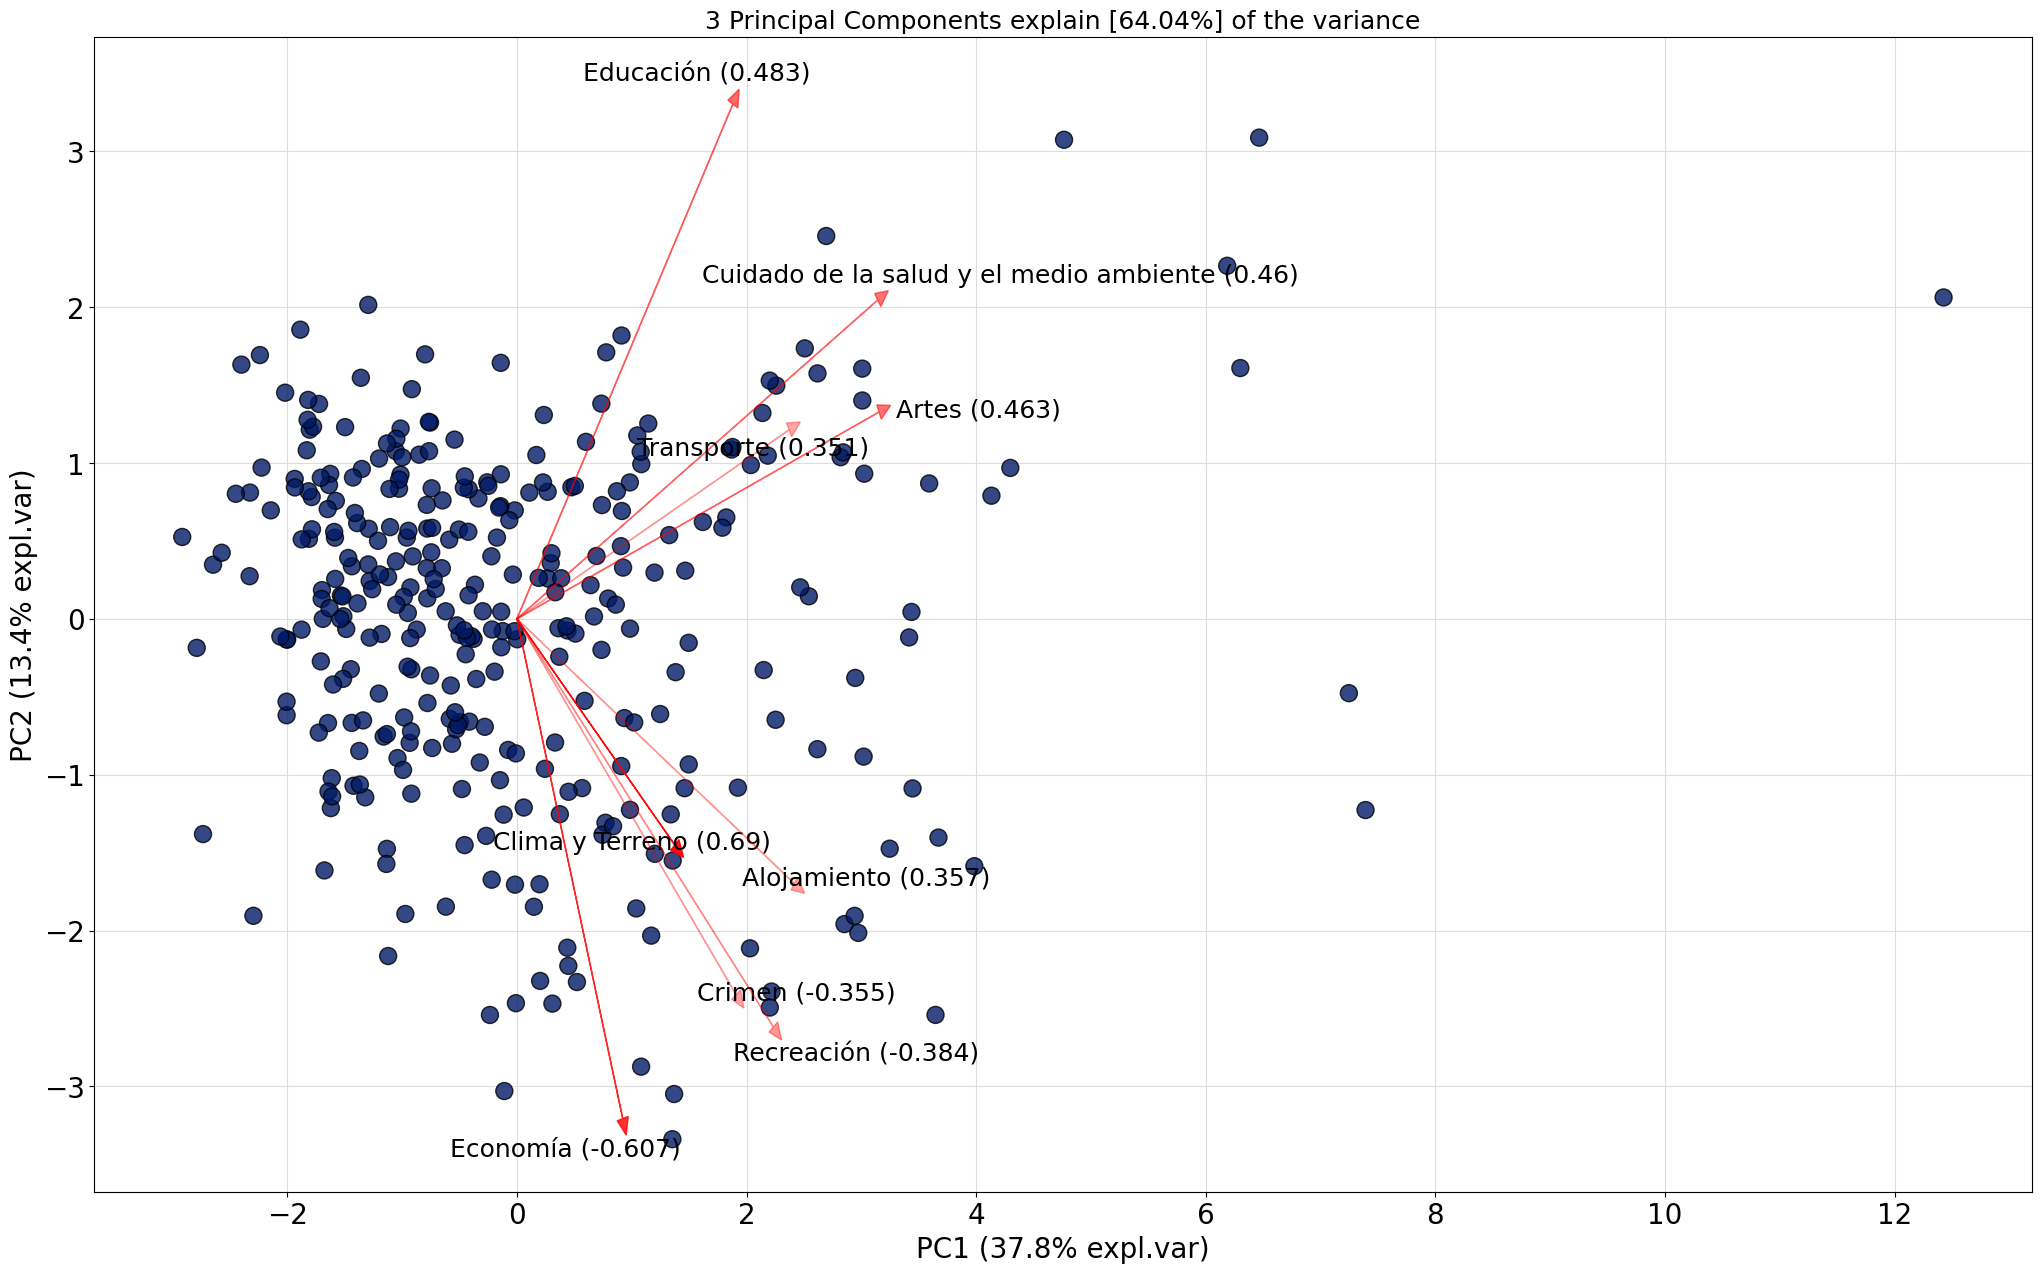

In [79]:
# Carguemos el paquete
from pca import pca
# Inicializamos el objeto PCA
model = pca(n_components=3)
lugares_pca = model.fit_transform(lugares_scalado, verbose=False)

# Creamos el biplot
fig, ax = model.biplot(legend=False, color_arrow="red", arrowdict={'color_text':"black"})
fig.show()

In [70]:
componentes[['CP1']].sort_values(by='CP1', ascending=False).head(6)

,CP1
Ciudad,
"New-York,NY",12.426251
"San-Francisco,CA",7.391403
"Los-Angeles,Long-Beach,CA",7.246307
"Chicago,IL",6.464912
"Boston,MA",6.301057
"Washington,DC-MD-VA",6.186471


In [78]:
componentes[['CP2']].sort_values(by='CP2', ascending=False).head(3)

,CP2
Ciudad,
"Las-Vegas,NV",3.339066
"Atlantic-City,NJ",3.048975
"Midland,TX",3.029992


In [77]:
componentes[['CP3']].sort_values(by='CP3', ascending=False).tail(7)

,CP3
Ciudad,
"Houston,TX",-2.211678
"Victoria,TX",-2.276685
"Ocala,FL",-2.299912
"Bryan-College-Station,TX",-2.318005
"Grand-Forks,ND",-2.406908
"Anchorage,AK",-2.702671
"Lafayette,LA",-2.742898


#### Procedimiento:

1. **Obtener las cargas o pesos de los componentes principales**:
   - Las cargas nos indican la importancia de cada variable original en los componentes principales.
   - Utilizamos los eigenvectores calculados previamente para visualizar de forma tabular los pesos asociados a cada una de las dimensiones o columnas de los datos.

2. **Visualizar las pesos en biplot**:
   - Utilizamos el gráfico de biplot para ilustrar los loadings de las variables en los dos primeros componentes.

3. **Interpretar los componentes**:
   - Se analizan los loadings de cada uno de los componentes, y asu vez se realiza la inspección del ranking de las ciudades para cada componente principal, de tal forma que se puedan encontrar características o patrones entre las ciudades que ayuden a interpretar las dimensiones o información sobre los aspectos de la calidad de vida que se están capturando.

#### Análisis:

- **Pesos de los componentes principales**:
A partir del gráfico de biplot se pueden observar los loadings más grandes de cada variable, así como las similitudes en el análisis de calidad de vida de las ciudades, dado por la cercania de los puntos que representan a cada ciudad, y su ubicación respecto a los ejes principales. De acuerdo con estos datos y la representación tabular se tiene:
  - **PC1**:
    - Tiene altos pesos en `Cuidado de la salud y el medio ambiente` (0.46), `Artes` (0.46), `Transporte` (0.35), y `Alojamiento` (0.35).
    - Observando el ranking de las ciudades para esta componente, se puede observar que el top está integrado por las ciudades principales de Estados Unidos (New York, San Francisco, Los Angeles, Washington), que sugiere que **PC1** representa un componente relacionado con la calidad de vida en términos de servicios de salud, actividades culturales y calidad de alojamiento.
      
  - **PC2**:
    - Tiene altas pesos en `Economía` (0.47), `Recreación` (0.38), y `Crimen` (0.35).
    - Observando el ranking de las ciudades para esta componente, destacan Las Vegas y Atlantic City en los dos primeros lugares, que son conocidas por su oferta de entretenimiento con los casinos, lo que puede explicar los pesos altos en temas recreativos, económicos y a su vez de criminalidad. Esto sugiere que **PC2** representa un componente relacionado actividades recreativas y de ocio.

  - **PC3**:
    - Tiene altas pesos en `Clima y terreno` (0.69), `Economia` (0.60).
    - Observando el ranking de las ciudades esta vez haciendo el análisis de forma inversa, es decir, desde las ciudades con los valores más bajos en dicha componente, se destacan 3 ciudades de Texas así como Lafayette en Lousiana, que es muy próxima al estado de Texas, está región a nivel climático resalta por sus altas temperaturas. De otro lado, se tiene ciudades como Anchorage en Alaska que de forma opuesta resalta por sus bajas temperaturas. Esto sugiere que **PC3** representa un componente relacionado al clima.

#### Conclusiones:

- **Importancia de la interpretación de las cargas**:
  - Las cargas de los componentes principales nos ayudan a entender qué variables originales están contribuyendo más a cada componente.
  - Esta interpretación es crucial para poder dar significado a los componentes y entender cómo se relacionan con la calidad de vida en las ciudades.

- **Componentes identificados**:
  - **PC1** puede ser interpretado como un componente de calidad de vida general que captura aspectos de servicios de salud, actividades culturales y calidad de alojamiento.
  - **PC2** puede ser interpretado como un componente de actividades de ocio y recreación.
  - **PC3** puede ser interpretado como un componente de calidad de vida respecto al clima del territorio.

- **Reducción de la dimensionalidad**:
  - Hemos reducido la dimensionalidad de los datos de 9 variables originales a 3 componentes principales, manteniendo una varianza del 64.04 %

### 5.   Detección de ciudades inusuales.

A partir de los Componentes Principales identifique las 5 ciudades calidad de vida inusualmente alta. En la distribución de calidad de vida  de la muestra que tan inusuales son? Cuáles son las dimensiones que hacen que estas ciudades tengan esta calidad de vida inusual?

                                 PC1       PC2       PC3
New-York,NY                12.426251  2.061746  0.209764
San-Francisco,CA            7.391403 -1.227000  1.691752
Los-Angeles,Long-Beach,CA   7.246307 -0.477152  2.050960
Chicago,IL                  6.464912  3.087134 -0.391669
Boston,MA                   6.301057  1.608742 -0.362661


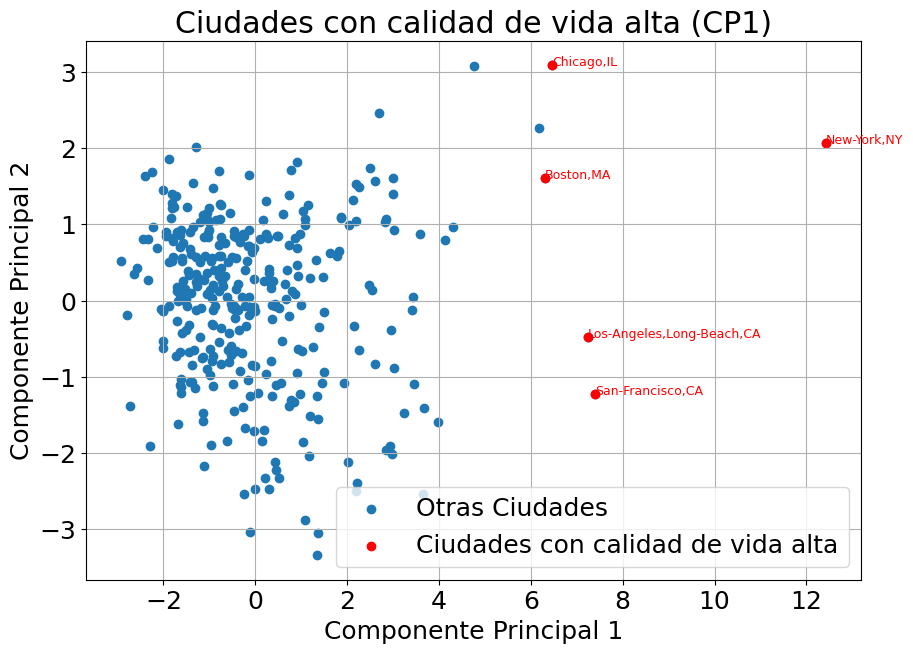

In [93]:
# Utilice este espacio para escribir el código.
# Crear un DataFrame con los componentes principales
pca_df = lugares_pca['PC']

# Identificar las 5 ciudades con los valores más altos en PC1
top_5_cities = pca_df.nlargest(5, 'PC1')
print(top_5_cities)

# Visualizar las ciudades inusuales
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], label='Otras Ciudades')
plt.scatter(top_5_cities['PC1'], top_5_cities['PC2'], color='red', label='Ciudades con calidad de vida alta')

# Mostrar los nombres solo para las ciudades inusuales
for ciudad, componentes in top_5_cities.iterrows():
    plt.text(componentes['PC1'], componentes['PC2'], ciudad, fontsize=9, color='red')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Ciudades con calidad de vida alta (CP1)')
plt.legend()
plt.grid()
plt.show()

#### Procedimiento:

1. **Transformar los datos usando PCA**:
   - Utilizamos los componentes principales obtenidos anteriormente para transformar los datos originales.
2. **Identificar las ciudades con valores extremos**:
   - Seleccionamos las ciudades con los valores más altos en los componentes principales, ya que estos representan la calidad de vida.
3. **Visualizar las ciudades inusuales**:
   - Visualizamos las ciudades anteriormente seleccionadas.

#### Análisis:

  - Seleccionamos las 5 ciudades con los valores más altos en el primer componente principal (PC1), que son:
    1. **New York, NY**
    2. **San Francisco, CA**
    3. **Los Angeles, Long Beach, CA**
    4. **Chicago, IL**
    5. **Boston, MA**
    

#### Conclusiones:

- **Ciudades inusuales**:
  - Las ciudades identificadas, como **New York, NY**, **San Francisco, CA**, **Los Angeles, Long Beach, CA**, **Chicago, IL**, y **Boston, MA**, tienen valores extremos en el primer componente principal (PC1), indicando una calidad de vida inusualmente alta.
  - Estas ciudades destacan principalmente en dimensiones relacionadas con servicios de salud, actividades culturales, calidad de alojamiento y transporte, como lo indican las altas cargas de estas variables en PC1.

- **Dimensiones clave**:
  - **New York, NY**: Destaca por su alta calidad en servicios de salud, actividades culturales y economía, lo que se refleja en su valor extremo en PC1.
  - **San Francisco, CA**: Tiene un perfil similar, con un énfasis en la calidad de salud, actividades culturales y estabilidad económica.
  - **Los Angeles, Long Beach, CA**: Aunque también destaca en PC1, muestra una combinación de alta calidad en servicios culturales y de transporte.
  - **Chicago, IL**: Su alta calidad en servicios de salud y actividades culturales contribuye significativamente a su posición en PC1.
  - **Boston, MA**: Similar a las otras ciudades, su alta calidad en educación, servicios de salud y actividades culturales la posicionan como una ciudad con calidad de vida alta.